# Use EasyOCR to recognize and locate text in images

- `EasyOCR` took over 20 seconds to process one image (full mobile size).
- It's much slower than `PyTesseract` but seems more accurate.

---

In [4]:
import easyocr
import cv2
import matplotlib.pyplot as plt

In [8]:
img = cv2.imread('img/test3.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
reader = easyocr.Reader(['ch_tra'])
results = reader.readtext(img)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


## An example item in results:
- box: `[[330, 251], [468, 251], [468, 295], [330, 295]]`
- text: `'幼基拉斯'`
- conf: `0.9971517324447632`

([[213, 51], [281, 51], [281, 91], [213, 91]], '樹果', 0.9871669347048606)
([[330, 251], [468, 251], [468, 295], [330, 295]], '幼基拉斯', 0.9971517324447632)
([[185, 433], [311, 433], [311, 475], [185, 475]], '幫忙間隔', 0.9243936538696289)
([[480, 427], [819, 427], [819, 490], [480, 490]], '每1小時18分43秒', 0.9982539179785362)
([[185, 573], [311, 573], [311, 615], [185, 615]], '持有上限', 0.9985108375549316)
([[478, 574], [554, 574], [554, 624], [478, 624]], '9個', 0.9992539137389159)
([[106, 782], [232, 782], [232, 836], [106, 836]], '主技能', 0.9930918845434938)
([[307, 968], [485, 968], [485, 1018], [307, 1018]], '活力填充$', 0.9941174256918158)
([[306, 1054], [594, 1054], [594, 1098], [306, 1098]], '讓自己回復活力12', 0.9792211144471326)
([[134, 1234], [200, 1234], [200, 1258], [134, 1258]], '.10', 0.9605864456754538)
([[707, 1281], [929, 1281], [929, 1325], [707, 1325]], '持有上限提升$', 0.9887449257400772)
([[197, 1457], [421, 1457], [421, 1501], [197, 1501]], '技能等級提升$', 0.9844034878247235)
([[104, 1864], [270, 1864]

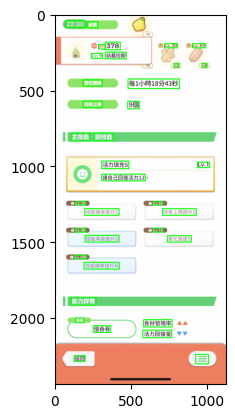

In [12]:
threshold = 0.9
for idx, detection in enumerate(results):
    box, text, conf = detection
    
    # Draw text box (color RGB: only Green=(0, 255, 0))
    if conf >= threshold:
        cv2.rectangle(img, box[0], box[2], (0, 255, 0), 5)
        print(results[idx])

# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));
plt.imshow(img);
# plt.savefig('out_box.png')

---
## Try a smaller image
- Only took about 10 seconds.

In [13]:
img = cv2.imread('img/test3cut.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
reader = easyocr.Reader(['ch_tra'])
results = reader.readtext(img)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


([[308, 66], [486, 66], [486, 116], [308, 116]], '活力填充$', 0.9945859782806921)
([[937, 73], [1017, 73], [1017, 109], [937, 109]], '[.1', 0.03934116293736037)
([[305, 151], [595, 151], [595, 199], [305, 199]], '讓自己回復活力12', 0.7799357820467414)
([[134, 332], [200, 332], [200, 358], [134, 358]], '[+.10', 0.02151804609932767)
([[644, 332], [710, 332], [710, 358], [644, 358]], '[+.25', 0.3613846979146587)
([[195, 381], [419, 381], [419, 423], [195, 423]], '技能機率提升$', 0.9868633901639366)
([[707, 381], [929, 381], [929, 423], [707, 423]], '持有上限提升$', 0.984627283715667)
([[134, 510], [200, 510], [200, 534], [134, 534]], '[+.50', 0.2563163880000347)
([[644, 510], [710, 510], [710, 534], [644, 534]], '[+.75', 0.5067477748188101)
([[195, 557], [419, 557], [419, 601], [195, 601]], '技能等級提升$', 0.9922122484065693)
([[739, 557], [897, 557], [897, 601], [739, 601]], '幫忙速度$', 0.9963576323826137)
([[128, 686], [206, 686], [206, 712], [128, 712]], '[+.100', 0.08257600649749476)
([[193, 735], [423, 735], [423,

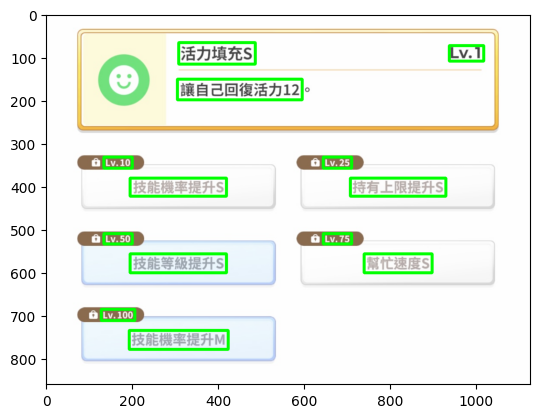

In [21]:
threshold = 0
for idx, detection in enumerate(results):
    # ([[339, 253], [445, 253], [445, 295], [339, 295]], '皮卡丘', 0.9992409619955723)
    box, text, conf = detection  
    if conf >= threshold:
        cv2.rectangle(img, box[0], box[2], (0, 255, 0), 5)
        print(results[idx])

plt.imshow(img);
plt.savefig('out_box.png')